**Importing the Libraries**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import svm, metrics
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score, accuracy_score

In [2]:
pip install hmmlearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
from hmmlearn import hmm

**Loading the Dataset**

In [4]:
data = pd.read_csv("bank-direct-marketing-campaigns.csv")

In [5]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
data['y'] = data['y'].map({'yes': 1, 'no': 0})

In [7]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [8]:
print('The Dataset has {} rows and {} columns.'.format(data.shape[0], data.shape[1]))

The Dataset has 41188 rows and 20 columns.


**Numerical Features**

In [9]:
numCols = list(data.select_dtypes(exclude='object').columns)
print(f"There are {len(numCols)} numerical features:\n", numCols)

There are 10 numerical features:
 ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


**Categorical Features**

In [10]:
catCols = list(data.select_dtypes(include='object').columns)
print(f"There are {len(catCols)} Categorial Features:\n", catCols)

There are 10 Categorial Features:
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [11]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

**Statistical Parameters**

In [12]:
data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


**Unique Values**

In [13]:
data.apply(lambda x: len(x.unique()))

age                78
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
campaign           42
pdays              27
previous            8
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         316
nr.employed        11
y                   2
dtype: int64

**Null Values**

In [14]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

**Finding Null Rows**

In [15]:
import numpy as np
data.replace('unknown', pd.NA, inplace=True)

# Convert boolean values to integers
boolean_columns = ['default', 'housing', 'loan']
data[boolean_columns] = data[boolean_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))

In [16]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,NaN,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0.0,1.0,0.0,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,0.0,0.0,0.0,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,0.0,1.0,0.0,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,0.0,0.0,0.0,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


**Converting Categorical Features**

In [17]:
categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))

In [18]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,4,2,1,0.0,0.0,0.0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,8,2,4,NaN,0.0,0.0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,8,2,4,0.0,1.0,0.0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,2,2,0.0,0.0,0.0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,8,2,4,0.0,0.0,1.0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,2,6,0.0,1.0,0.0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,2,2,6,0.0,0.0,0.0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,6,2,7,0.0,1.0,0.0,0,7,0,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,10,2,6,0.0,0.0,0.0,0,7,0,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [19]:
data.drop(['emp.var.rate', 'cons.conf.idx'], axis=1, inplace=True)

In [20]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,euribor3m,nr.employed,y
0,56,4,2,1,0.0,0.0,0.0,1,6,1,1,999,0,1,93.994,4.857,5191.0,0
1,57,8,2,4,NaN,0.0,0.0,1,6,1,1,999,0,1,93.994,4.857,5191.0,0
2,37,8,2,4,0.0,1.0,0.0,1,6,1,1,999,0,1,93.994,4.857,5191.0,0
3,40,1,2,2,0.0,0.0,0.0,1,6,1,1,999,0,1,93.994,4.857,5191.0,0
4,56,8,2,4,0.0,0.0,1.0,1,6,1,1,999,0,1,93.994,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,2,6,0.0,1.0,0.0,0,7,0,1,999,0,1,94.767,1.028,4963.6,1
41184,46,2,2,6,0.0,0.0,0.0,0,7,0,1,999,0,1,94.767,1.028,4963.6,0
41185,56,6,2,7,0.0,1.0,0.0,0,7,0,2,999,0,1,94.767,1.028,4963.6,0
41186,44,10,2,6,0.0,0.0,0.0,0,7,0,1,999,0,1,94.767,1.028,4963.6,1


In [21]:
data.dropna(inplace=True)

In [22]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,euribor3m,nr.employed,y
0,56,4,2,1,0.0,0.0,0.0,1,6,1,1,999,0,1,93.994,4.857,5191.0,0
2,37,8,2,4,0.0,1.0,0.0,1,6,1,1,999,0,1,93.994,4.857,5191.0,0
3,40,1,2,2,0.0,0.0,0.0,1,6,1,1,999,0,1,93.994,4.857,5191.0,0
4,56,8,2,4,0.0,0.0,1.0,1,6,1,1,999,0,1,93.994,4.857,5191.0,0
6,59,1,2,6,0.0,0.0,0.0,1,6,1,1,999,0,1,93.994,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,2,6,0.0,1.0,0.0,0,7,0,1,999,0,1,94.767,1.028,4963.6,1
41184,46,2,2,6,0.0,0.0,0.0,0,7,0,1,999,0,1,94.767,1.028,4963.6,0
41185,56,6,2,7,0.0,1.0,0.0,0,7,0,2,999,0,1,94.767,1.028,4963.6,0
41186,44,10,2,6,0.0,0.0,0.0,0,7,0,1,999,0,1,94.767,1.028,4963.6,1


**Correlated Features**

In [23]:
data.corr().style.background_gradient(cmap='gist_heat')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,euribor3m,nr.employed,y
age,1.000000,-0.012190,-0.395833,-0.138045,0.002952,0.001855,-0.010697,-0.012373,-0.013010,-0.014556,-0.003552,-0.047451,0.045727,0.011905,-0.037416,-0.036070,-0.063312,0.049509
job,-0.012190,1.000000,0.023893,0.086833,0.015096,0.007928,-0.019319,-0.030965,-0.032907,-0.004386,-0.007901,-0.024747,0.019774,0.009078,-0.018250,-0.012395,-0.021457,0.023639
marital,-0.395833,0.023893,1.000000,0.097027,-0.002919,0.012245,0.004088,-0.057168,-0.021100,0.003658,-0.008897,-0.032150,0.032643,0.002894,-0.046444,-0.083204,-0.076349,0.040252
education,-0.138045,0.086833,0.097027,1.000000,0.003017,0.021143,0.009300,-0.089495,-0.077837,-0.005475,0.007477,-0.012298,-0.000227,0.018377,-0.062062,0.011468,0.015125,0.022894
default,0.002952,0.015096,-0.002919,0.003017,1.000000,-0.004042,-0.004180,-0.006821,-0.005081,0.006867,-0.004247,0.002097,0.002462,-0.006522,-0.002674,0.006779,0.007342,-0.003734
housing,0.001855,0.007928,0.012245,0.021143,-0.004042,1.000000,0.048100,-0.081352,-0.014179,0.003595,-0.010645,-0.008941,0.021801,-0.013409,-0.077684,-0.058593,-0.044660,0.012092
loan,-0.010697,-0.019319,0.004088,0.009300,-0.004180,0.048100,1.000000,-0.010922,-0.003468,-0.009139,0.007080,0.001108,-0.002590,-0.002374,-0.003943,-0.002468,0.003246,-0.004687
contact,-0.012373,-0.030965,-0.057168,-0.089495,-0.006821,-0.081352,-0.010922,1.000000,0.240092,-0.011210,0.079459,0.117071,-0.203474,0.105567,0.561422,0.386687,0.262973,-0.145983
month,-0.013010,-0.032907,-0.021100,-0.077837,-0.005081,-0.014179,-0.003468,0.240092,1.000000,0.025287,-0.067028,-0.047791,0.104439,-0.066535,-0.017301,-0.116527,-0.212657,-0.007554
day_of_week,-0.014556,-0.004386,0.003658,-0.005475,0.006867,0.003595,-0.009139,-0.011210,0.025287,1.000000,-0.038000,-0.009648,-0.001923,0.017381,0.007562,0.040945,0.030872,0.019778


**Plotting the Dataset**

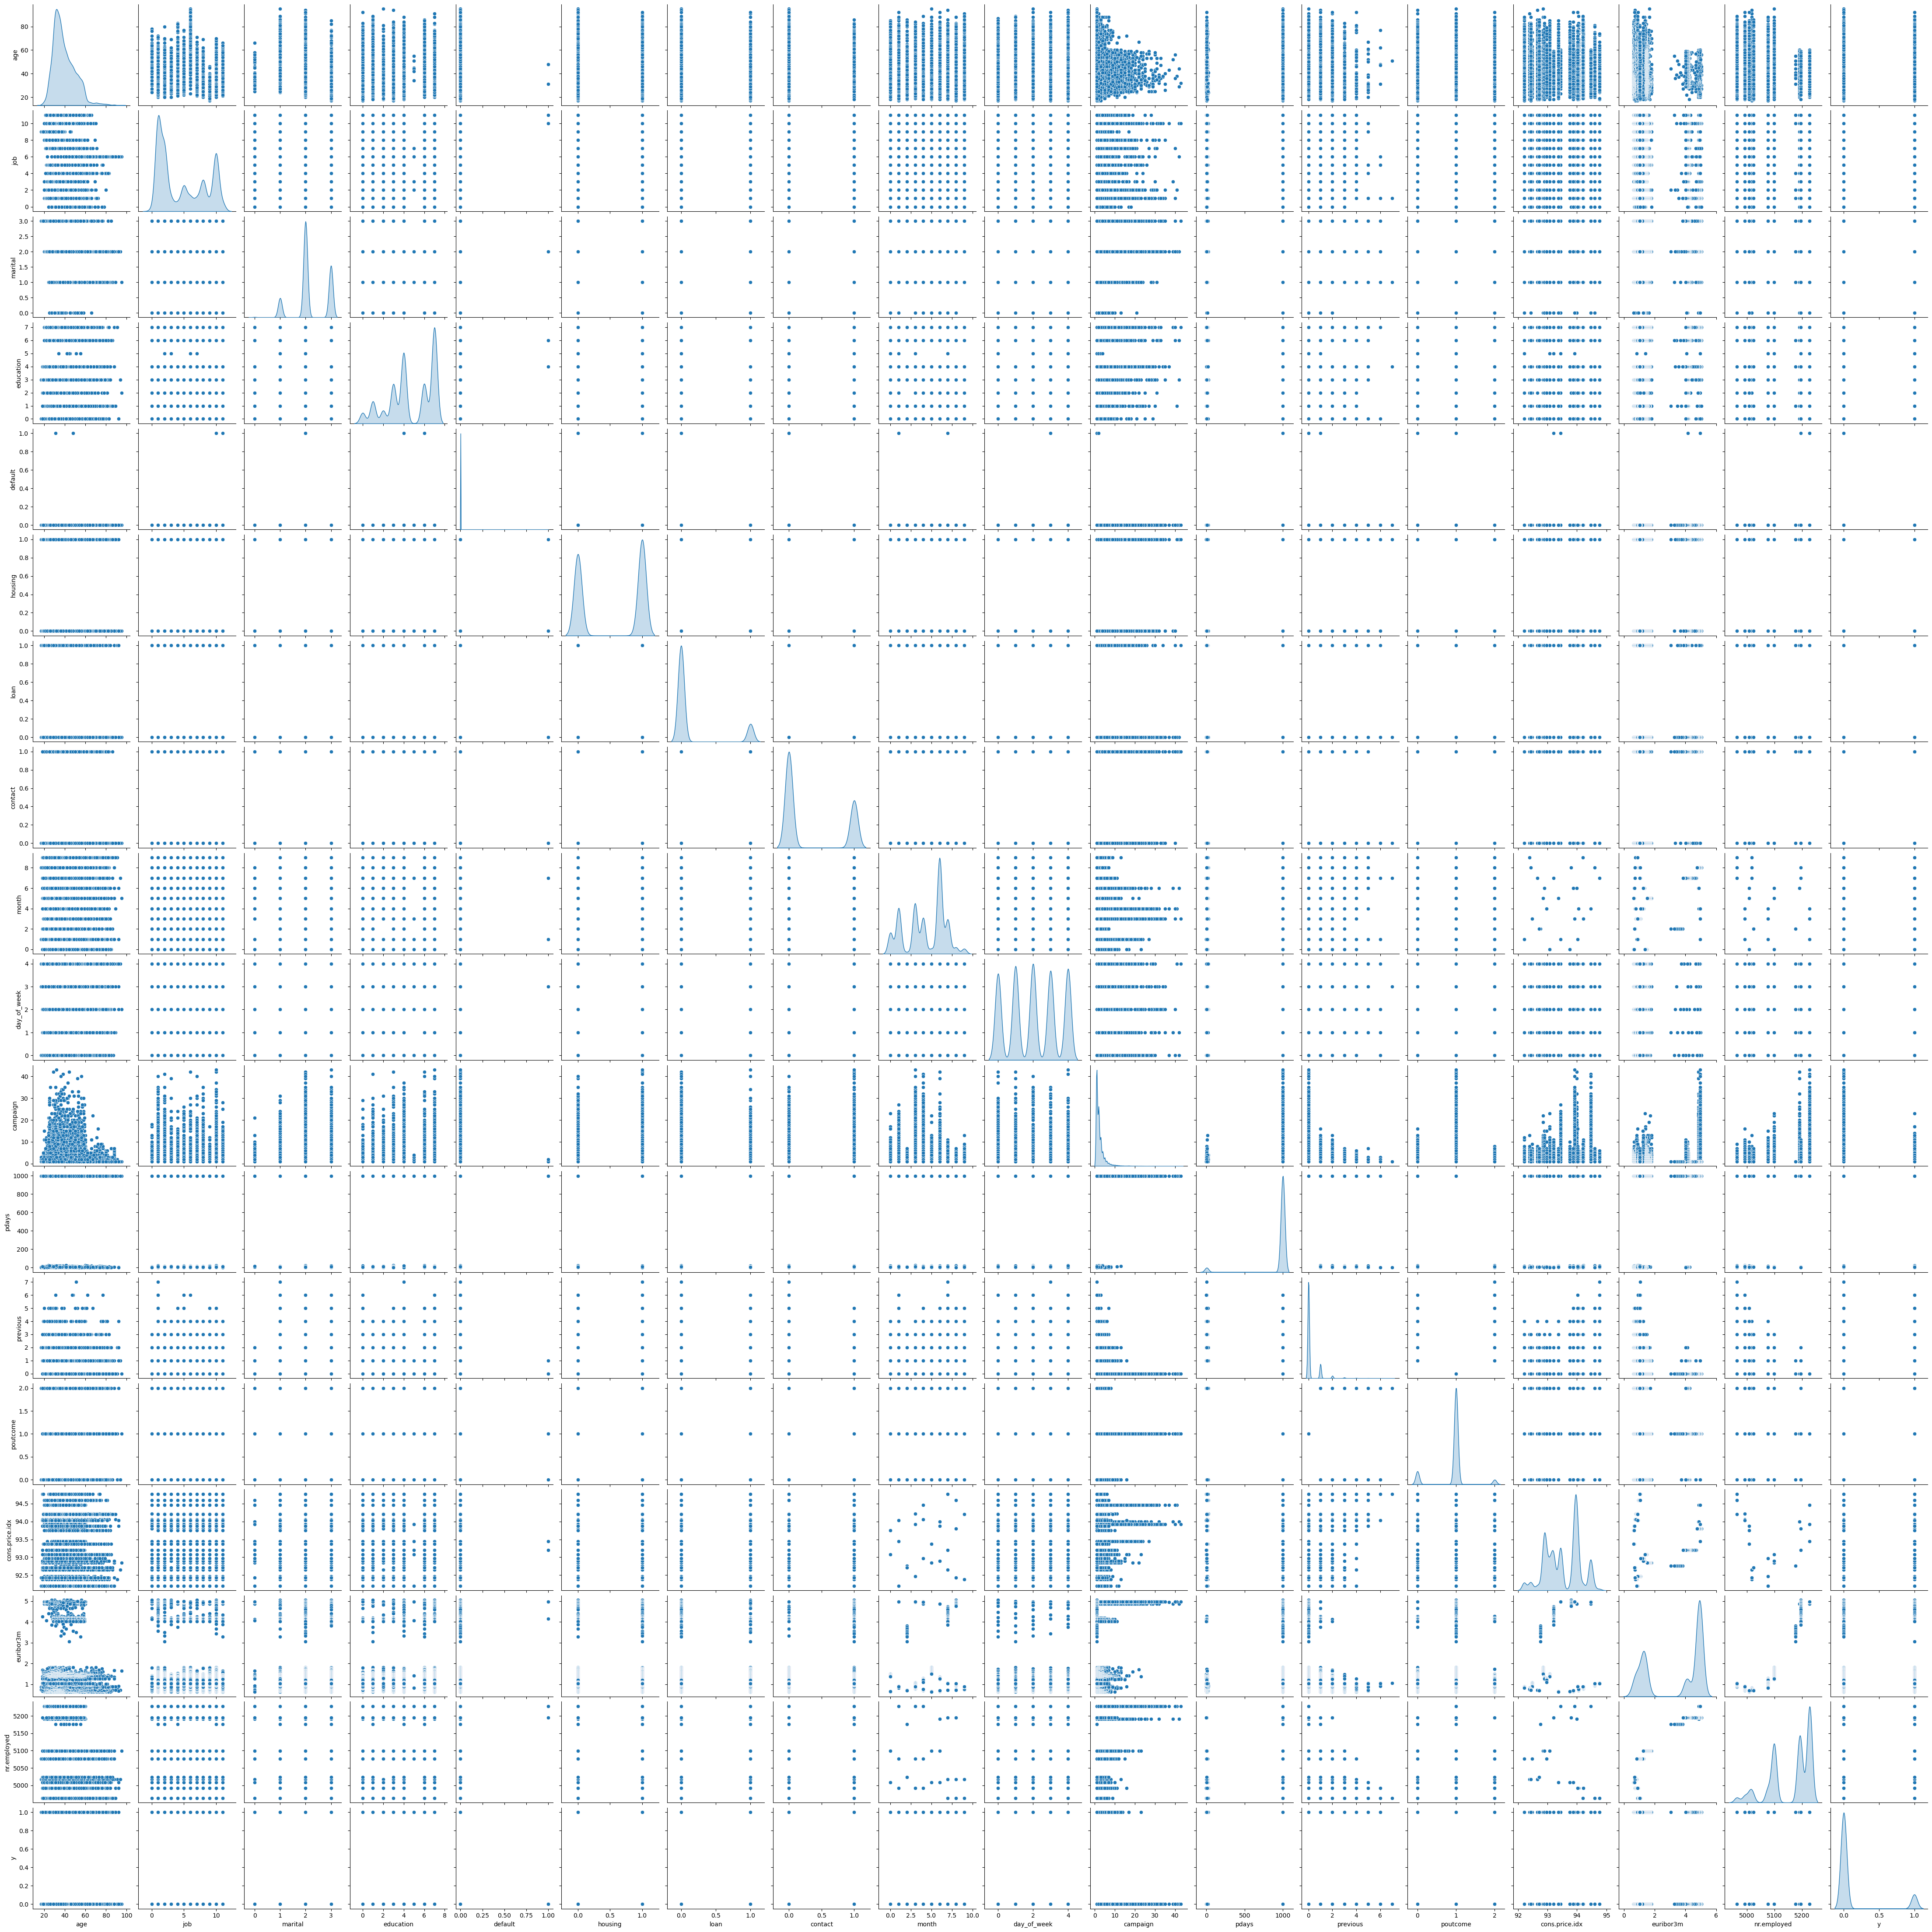

In [ ]:
import seaborn as sns
import matplotlib.pylab as plt
sns.pairplot(data, diag_kind='kde')
plt.show()

In [24]:
X = data.drop('y', axis=1)
y = data['y']

In [25]:
X.shape

(31828, 17)

In [26]:
y

0        0
2        0
3        0
4        0
6        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 31828, dtype: int64

**Splitting the Dataset**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [28]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,euribor3m,nr.employed
28191,41,1,2,7,0.0,1.0,1.0,0,0,3,1,999,0,1,93.075,1.453,5099.1
7869,55,3,1,7,0.0,1.0,1.0,1,4,1,2,999,0,1,94.465,4.865,5228.1
22048,55,8,2,3,0.0,0.0,0.0,0,1,4,13,999,0,1,93.444,4.964,5228.1
12158,36,2,2,3,0.0,0.0,0.0,1,3,3,7,999,0,1,93.918,4.955,5228.1
29253,47,10,1,7,0.0,0.0,1.0,0,0,0,2,999,1,0,93.075,1.405,5099.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23639,38,0,2,0,0.0,1.0,0.0,0,1,2,10,999,0,1,93.444,4.962,5228.1
34649,30,10,2,7,0.0,1.0,0.0,0,6,2,3,999,0,1,92.893,1.266,5099.1
2836,29,2,2,6,0.0,1.0,1.0,1,6,4,1,999,0,1,93.994,4.859,5191.0
9212,35,2,2,3,0.0,0.0,0.0,1,4,0,1,999,0,1,94.465,4.967,5228.1


In [29]:
y_train

28191    0
7869     0
22048    0
12158    0
29253    0
        ..
23639    0
34649    0
2836     0
9212     0
37598    0
Name: y, Length: 25462, dtype: int64

**Applying Standard Scaler**

In [30]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
X_train_scaled

array([[ 0.17534966, -1.02379482, -0.30421131, ..., -0.76112795,
        -1.11649193, -0.80542188],
       [ 1.51095952, -0.47083008, -1.89440398, ...,  1.59683007,
         0.79522292,  0.89900804],
       [ 1.51095952,  0.91158176, -0.30421131, ..., -0.13516643,
         0.85069178,  0.89900804],
       ...,
       [-0.96945879, -0.74731245, -0.30421131, ...,  0.79783854,
         0.79186117,  0.40881928],
       [-0.39705457, -0.74731245, -0.30421131, ...,  1.59683007,
         0.85237266,  0.89900804],
       [ 2.56036726,  0.35861702, -0.30421131, ..., -2.24375767,
        -1.44818454, -1.10799122]])

In [33]:
X_test_scaled

array([[-0.96945879, -0.74731245, -0.30421131, ..., -1.06986778,
        -1.20725917, -0.80542188],
       [ 0.27075036, -1.02379482, -1.89440398, ...,  1.59683007,
         0.84789032,  0.89900804],
       [-0.01545175, -0.74731245, -0.30421131, ..., -1.06986778,
        -1.23023112, -0.80542188],
       ...,
       [-0.96945879,  1.4645465 , -0.30421131, ...,  0.79783854,
         0.79186117,  0.40881928],
       [-1.0648595 ,  0.91158176, -0.30421131, ...,  0.66891422,
         0.8495712 ,  0.89900804],
       [-0.01545175,  1.4645465 , -0.30421131, ...,  0.66891422,
         0.85293295,  0.89900804]])


**Supervised Classifier**

In [34]:
classifiers = {
    'SVM': svm.SVC(),
    'Adaboost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
}

In [35]:
for classifier_name, classifier in classifiers.items():
    default_params = classifier.get_params()
    print("Classifier:", classifier_name)
    for param_name, param_value in default_params.items():
        print(param_name + ": " + str(param_value))
    print()

Classifier: SVM
C: 1.0
break_ties: False
cache_size: 200
class_weight: None
coef0: 0.0
decision_function_shape: ovr
degree: 3
gamma: scale
kernel: rbf
max_iter: -1
probability: False
random_state: None
shrinking: True
tol: 0.001
verbose: False

Classifier: Adaboost
algorithm: SAMME.R
base_estimator: None
learning_rate: 1.0
n_estimators: 50
random_state: None

Classifier: Gradient Boosting
ccp_alpha: 0.0
criterion: friedman_mse
init: None
learning_rate: 0.1
loss: deviance
max_depth: 3
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_iter_no_change: None
random_state: None
subsample: 1.0
tol: 0.0001
validation_fraction: 0.1
verbose: 0
warm_start: False

Classifier: XGBoost
objective: binary:logistic
use_label_encoder: None
base_score: None
booster: None
callbacks: None
colsample_bylevel: None
colsample_bynode: None
colsample_bytree: None
early_stopping_rounds: None
enable_categori

In [36]:
results_supervised = {}

for name, classifier in classifiers.items():
    classifier.fit(X_train_scaled, y_train)
    y_pred = classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    
    results_supervised[name] = {
        'Accuracy': accuracy,
        'F1-Score': f1,
        'Sensitivity': sensitivity,
        'Specificity': specificity
    }
    
    # Print confusion matrix
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    print(f'Confusion Matrix for {name}:')
    print(confusion_matrix)
    print('\n')

Confusion Matrix for SVM:
[[5449   97]
 [ 615  205]]


Confusion Matrix for Adaboost:
[[5465   81]
 [ 625  195]]


Confusion Matrix for Gradient Boosting:
[[5438  108]
 [ 600  220]]


Confusion Matrix for XGBoost:
[[5388  158]
 [ 553  267]]




In [37]:
for name, results in results_supervised.items():
    print(f"Results for {name}:")
    print("Accuracy:", results['Accuracy'])
    print("F1-Score:", results['F1-Score'])
    print("Sensitivity:", results['Sensitivity'])
    print("Specificity:", results['Specificity'])
    print()

Results for SVM:
Accuracy: 0.8881558278353754
F1-Score: 0.36541889483065954
Sensitivity: 0.25
Specificity: 0.9825099170573386

Results for Adaboost:
Accuracy: 0.8890983349041784
F1-Score: 0.35583941605839414
Sensitivity: 0.23780487804878048
Specificity: 0.9853948791922106

Results for Gradient Boosting:
Accuracy: 0.8887841658812441
F1-Score: 0.3832752613240418
Sensitivity: 0.2682926829268293
Specificity: 0.9805265055896142

Results for XGBoost:
Accuracy: 0.8883129123468426
F1-Score: 0.4289156626506025
Sensitivity: 0.325609756097561
Specificity: 0.9715109989181392



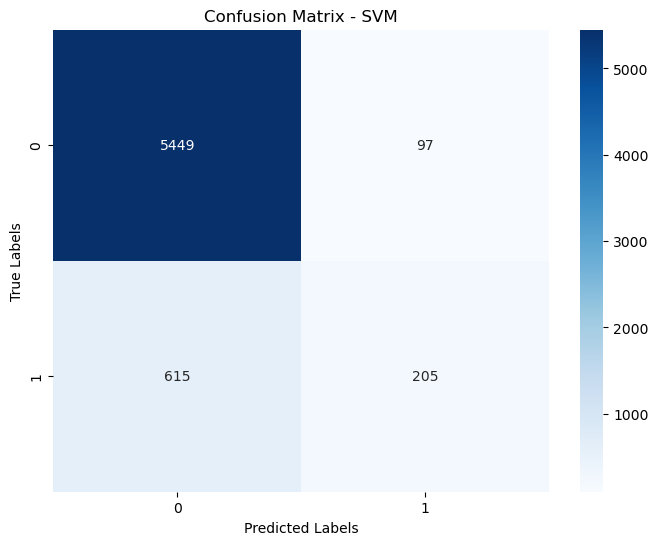

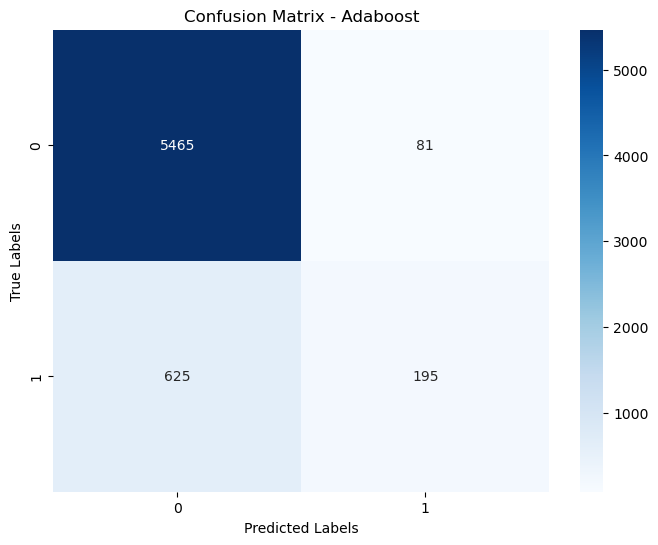

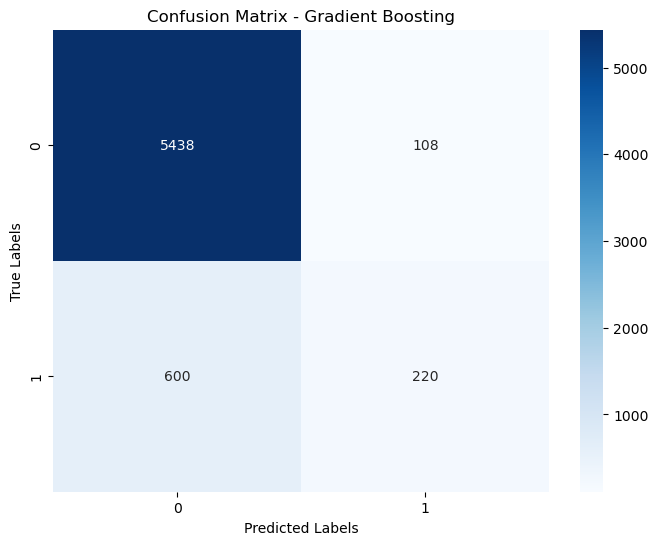

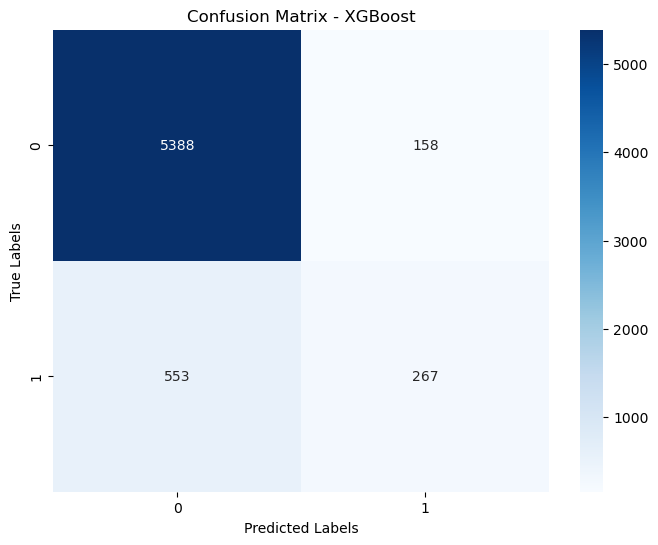

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

classifiers = {
    'SVM': svm.SVC(),
    'Adaboost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
}

for name, classifier in classifiers.items():
    classifier.fit(X_train_scaled, y_train)
    y_pred = classifier.predict(X_test_scaled)
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


**Plotting ROC Curve**

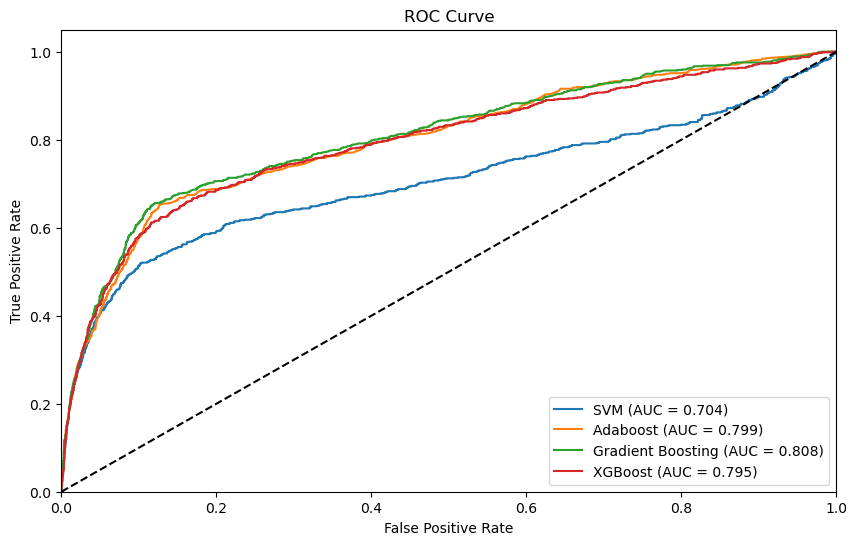

In [39]:
import matplotlib.pyplot as plt

# Plot the ROC curve and calculate AUC for each supervised model
plt.figure(figsize=(10, 6))

for name, classifier in classifiers.items():
    if hasattr(classifier, "decision_function"):
        # For classifiers with decision_function method
        scores = classifier.decision_function(X_test_scaled)
    else:
        # For classifiers without decision_function, use predict_proba if available
        scores = classifier.predict_proba(X_test_scaled)[:, 1]
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, scores)
    auc = metrics.auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [40]:
from hmmlearn import hmm

# Create and train the HMM model
model = hmm.GaussianHMM(n_components=2)
model.fit(X_train_scaled)

# Predict the labels using the HMM model
y_pred = model.predict(X_test_scaled)

# Evaluate the performance of the HMM model
accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
sensitivity = metrics.recall_score(y_test, y_pred)
specificity = metrics.recall_score(y_test, y_pred, pos_label=0)

# Print the performance metrics of the HMM model
print("HMM Model Performance:")
print("Accuracy:", accuracy)
print("F1-Score:", f1_score)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Model is not converging.  Current: -138579.97437974517 is not greater than -138579.68493098117. Delta is -0.28944876400055364


HMM Model Performance:
Accuracy: 0.6764059063776312
F1-Score: 0.3734793187347932
Sensitivity: 0.748780487804878
Specificity: 0.6657050126217093


Confusion Matrix for HMM:
[[3826 1720]
 [ 194  626]]




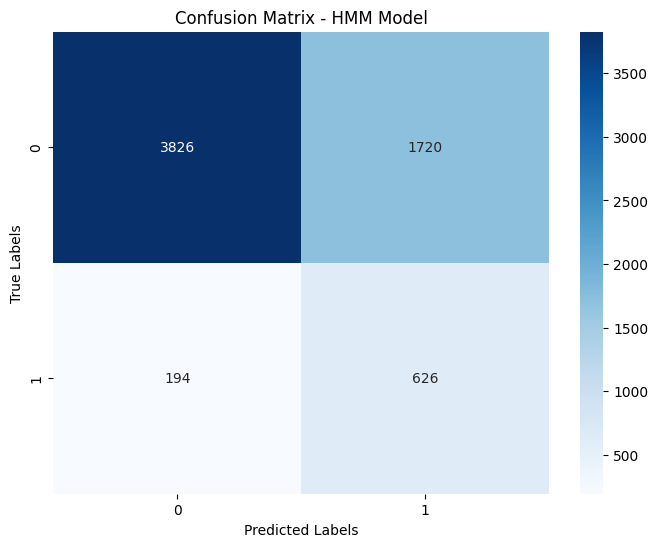

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create and train the HMM model
model = hmm.GaussianHMM(n_components=2)
model.fit(X_train_scaled)

# Predict the labels using the HMM model
y_pred = model.predict(X_test_scaled)

# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix for HMM:')
print(confusion_matrix)
print('\n')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - HMM Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**Unsupervised Classifier**

In [41]:
pip install fuzzy-c-means

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 2.2/2.2 MB 2.8 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from fcmeans import FCM

In [43]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_scaled)

# Evaluate K-means clustering
kmeans_silhouette_score = silhouette_score(X_train_scaled, kmeans.labels_)
print("K-means Clustering Silhouette Score:", kmeans_silhouette_score)

K-means Clustering Silhouette Score: 0.1946060790437926


In [44]:
from sklearn.metrics import confusion_matrix

# Predict the cluster labels for the training data
kmeans_labels = kmeans.labels_

# Compute the metrics using true labels and predicted labels
tn, fp, fn, tp = confusion_matrix(y_train, kmeans_labels).ravel()

# Calculate sensitivity (true positive rate)
sensitivity = tp / (tp + fn)

# Calculate specificity (true negative rate)
specificity = tn / (tn + fp)

# Calculate F1-score
f1_score = 2 * (tp / (tp + fp)) * (tp / (tp + fn)) / ((tp / (tp + fp)) + (tp / (tp + fn)))

# Calculate AUC score
auc_score = roc_auc_score(y_train, kmeans_labels)

# Calculate total accuracy
total_accuracy = accuracy_score(y_train, kmeans_labels)

# Print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)
print("AUC score:", auc_score)
print("Total accuracy:", total_accuracy)

Sensitivity: 0.7604388905821395
Specificity: 0.6651187953654029
F1-score: 0.37791578309603147
AUC score: 0.7127788429737711
Total accuracy: 0.6774016180975572


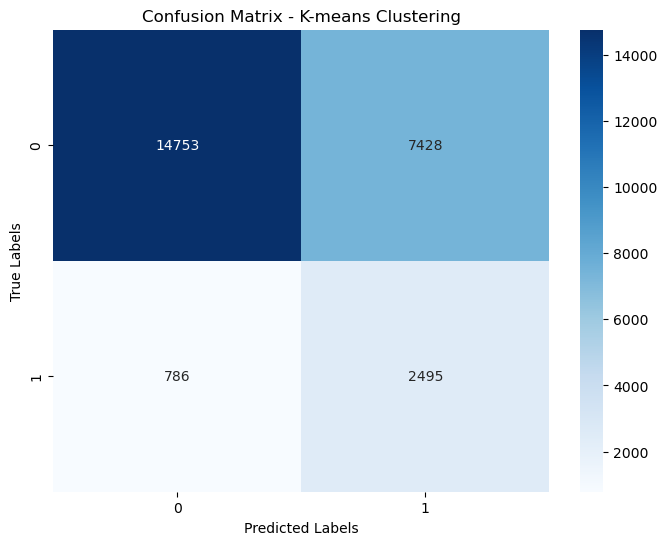

Confusion Matrix:
[[14753  7428]
 [  786  2495]]


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict the cluster labels for the training data
kmeans_labels = kmeans.labels_

# Compute the confusion matrix
confusion_matrix = confusion_matrix(y_train, kmeans_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - K-means Clustering')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix with values
print("Confusion Matrix:")
print(confusion_matrix)

In [46]:
# Train FCM clustering
fcm = FCM(n_clusters=2)
fcm.fit(X_train_scaled)

# Evaluate FCM clustering
fcm_silhouette_score = silhouette_score(X_train_scaled, fcm.u.argmax(axis=1))
print("FCM Clustering Silhouette Score:", fcm_silhouette_score)

FCM Clustering Silhouette Score: 0.17541630672975633


In [47]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score

# Predict the cluster labels for the training data
fcm_labels = fcm.u.argmax(axis=1)

# Compute the metrics using true labels and predicted labels
tn, fp, fn, tp = confusion_matrix(y_train, fcm_labels).ravel()

# Calculate sensitivity (true positive rate)
sensitivity = tp / (tp + fn)

# Calculate specificity (true negative rate)
specificity = tn / (tn + fp)

# Calculate F1-score
f1_score = 2 * (tp / (tp + fp)) * (tp / (tp + fn)) / ((tp / (tp + fp)) + (tp / (tp + fn)))

# Calculate AUC score
auc_score = roc_auc_score(y_train, fcm_labels)

# Calculate total accuracy
total_accuracy = accuracy_score(y_train, fcm_labels)

# Print the results
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)
print("AUC score:", auc_score)
print("Total accuracy:", total_accuracy)

Sensitivity: 0.2151782992989942
Specificity: 0.3866822956584464
F1-score: 0.08026831902677506
AUC score: 0.3009302974787203
Total accuracy: 0.3645825151205718


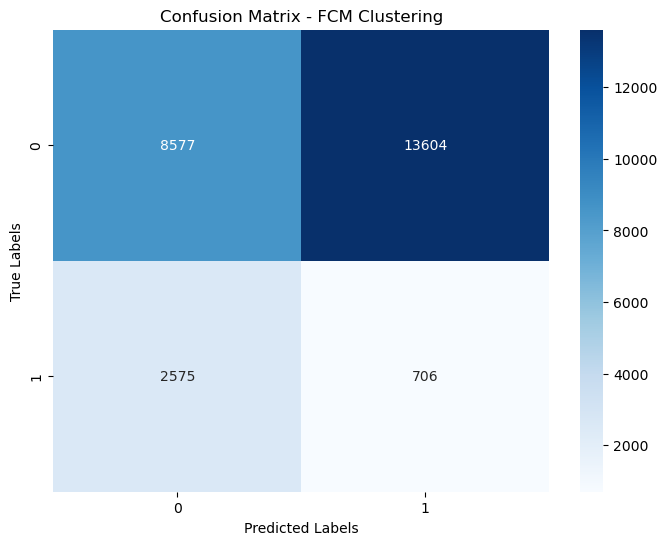

Confusion Matrix:
[[ 8577 13604]
 [ 2575   706]]


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict the cluster labels for the training data
fcm_labels = fcm.u.argmax(axis=1)

# Compute the confusion matrix
confusion_matrix = confusion_matrix(y_train, fcm_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - FCM Clustering')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix with values
print("Confusion Matrix:")
print(confusion_matrix)

In [49]:
# Print the results of K-means clustering
print("K-means Clustering Results:")
print("Cluster Centers:")
print(kmeans.cluster_centers_)
print("Cluster Labels:")
print(kmeans.labels_)

# Print the results of FCM clustering
print("FCM Clustering Results:")
print("Cluster Centers:")
print(fcm.centers)
print("Cluster Labels:")
print(fcm.u.argmax(axis=1))

K-means Clustering Results:
Cluster Centers:
[[-0.01834957 -0.01236292 -0.06597407  0.00894667  0.00400205 -0.04538908
  -0.00411757  0.31756896 -0.06791264  0.03112774  0.10598317  0.21497503
  -0.37078527  0.18634889  0.52354286  0.7699018   0.71193425]
 [ 0.02873465  0.01935981  0.10331262 -0.01401012 -0.00626704  0.07107739
   0.00644794 -0.49729962  0.10634834 -0.04874473 -0.16596518 -0.33664185
   0.58063411 -0.29181451 -0.81984607 -1.20563379 -1.11485905]]
Cluster Labels:
[1 0 0 ... 0 0 1]
FCM Clustering Results:
Cluster Centers:
[[-8.51321753e-09  2.96528545e-08  9.25035401e-08  5.19984954e-08
   9.51979662e-10  1.03934657e-07  4.57555108e-08 -4.86250808e-07
   6.00002654e-08 -3.26184352e-08 -5.70058767e-08 -9.34590295e-08
   2.39343297e-07 -1.84360856e-07 -6.38700350e-07 -6.98180171e-07
  -5.99424208e-07]
 [ 8.51318593e-09 -2.96528774e-08 -9.25035213e-08 -5.19985066e-08
  -9.51981431e-10 -1.03934646e-07 -4.57555691e-08  4.86250779e-07
  -6.00002026e-08  3.26184236e-08  5.70058

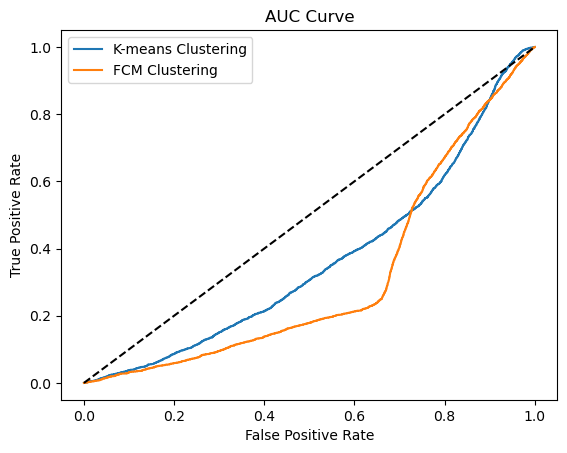

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Compute the distances from the cluster centers for K-means clustering
kmeans_distances = kmeans.transform(X_train_scaled)
kmeans_probabilities = 1 - (kmeans_distances.min(axis=1) / kmeans_distances.max(axis=1))

# Compute the predicted probabilities for FCM clustering
fcm_probabilities = fcm.u[:, 1]

# Compute the false positive rate, true positive rate, and thresholds for K-means clustering
kmeans_fpr, kmeans_tpr, kmeans_thresholds = roc_curve(y_train, kmeans_probabilities)

# Compute the false positive rate, true positive rate, and thresholds for FCM clustering
fcm_fpr, fcm_tpr, fcm_thresholds = roc_curve(y_train, fcm_probabilities)

# Plot the AUC curve
plt.plot(kmeans_fpr, kmeans_tpr, label='K-means Clustering')
plt.plot(fcm_fpr, fcm_tpr, label='FCM Clustering')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend()
plt.show()

**Feature Selection Methods**                 
a) Sequential Forward Selection                        
b) Minimum Redundancy Maximum Relevance                
c) Relief                                            

In [51]:
!pip install scikit-learn
!pip install hmmlearn
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [52]:
from sklearn.feature_selection import SequentialFeatureSelector, SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [53]:
!pip install skrebate

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29255 sha256=f958a764b86a81ffa56e1d22c226768d0796e6cec39698c2ac459f81d5c37ec7
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\f3\a1\a2\a4a90339e8fe767416385d9aabc02ab731fa14d55ce7694a33
Successfully built skrebate


In [54]:
from skrebate import ReliefF

In [55]:
def sequential_forward_selection(X_train, y_train, X_test, num_features):
    sfs = SequentialFeatureSelector(estimator=SVC(kernel='linear'), n_features_to_select=num_features)
    sfs.fit(X_train, y_train)
    X_train_selected = sfs.transform(X_train)
    X_test_selected = sfs.transform(X_test)
    return X_train_selected, X_test_selected

In [56]:
def minimum_redundancy_maximum_relevance(X_train, y_train, X_test, num_features):
    selector = SelectKBest(f_classif, k=num_features)
    selector.fit(X_train, y_train)
    X_train_selected = selector.transform(X_train)
    X_test_selected = selector.transform(X_test)
    return X_train_selected, X_test_selected

In [57]:
def relief(X_train, y_train, X_test, num_features):
    selector = ReliefF(n_neighbors=10, n_features_to_keep=num_features)
    selector.fit(X_train, y_train)
    X_train_selected = selector.transform(X_train)
    X_test_selected = selector.transform(X_test)
    return X_train_selected, X_test_selected

In [58]:
num_features_range = range(1, X_train.shape[1] + 1)
results = {}

In [59]:
num_features_range

range(1, 18)

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector, SelectKBest, f_classif
from skrebate import ReliefF
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from skrebate import ReliefF
from pymrmr import mRMR
from mlxtend.feature_selection import SequentialFeatureSelector
import numpy as np

# Define the SVM classifier
clf = SVC()

# Define the range of number of features to be selected
num_features_range = range(5, X_train.shape[1]+1, 5)

# Sequential Forward Selection (SFS)
sfs = SequentialFeatureSelector(clf, k_features='best', forward=True, n_jobs=-1)
sfs.fit(X_train, y_train)
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)
y_pred_sfs = clf.predict(X_test_sfs)
accuracy_sfs = accuracy_score(y_test, y_pred_sfs)
f1_score_sfs = f1_score(y_test, y_pred_sfs)
auc_score_sfs = roc_auc_score(y_test, y_pred_sfs)
best_params_sfs = sfs.k_feature_names_

print("Sequential Forward Selection (SFS)")
print("Best parameters: ", best_params_sfs)
print("Accuracy score: ", accuracy_sfs)
print("F1 score: ", f1_score_sfs)
print("AUC score: ", auc_score_sfs)
print("Sensitivity score: ", sensitivity_score_sfs)
print("Specificity score: ", specificity_score_sfs)
print()

# Minimum Redundancy Maximum Relevance (MRMR)
mrmr = mRMR.mRMR()
mrmr.fit(X_train, y_train)
mrmr_features = mrmr.feature_selection(num_features_range[-1], method='MIQ', verbose=False)
X_train_mrmr = X_train[:, mrmr_features]
X_test_mrmr = X_test[:, mrmr_features]
clf.fit(X_train_mrmr, y_train)
y_pred_mrmr = clf.predict(X_test_mrmr)
accuracy_mrmr = accuracy_score(y_test, y_pred_mrmr)
f1_score_mrmr = f1_score(y_test, y_pred_mrmr)
auc_score_mrmr = roc_auc_score(y_test, y_pred_mrmr)
best_params_mrmr = [str(idx) for idx in mrmr_features[:best_num_features]]

print("Minimum Redundancy Maximum Relevance (MRMR)")
print("Best parameters: ", best_params_mrmr)
print("Accuracy score: ", accuracy_mrmr)
print("F1 score: ", f1_score_mrmr)
print("AUC score: ", auc_score_mrmr)
print("Sensitivity score: ", sensitivity_score_mrmr)
print("Specificity score: ", specificity_score_mrmr)
print()

# Relief feature selection
relief = ReliefF(n_features_to_select=num_features_range[-1])
relief.fit(X_train, y_train)
relief_features = relief.top_features
X_train_relief = X_train[:, relief_features]
X_test_relief = X_test[:, relief_features]
clf.fit(X_train_relief, y_train)
y_pred_relief = clf.predict(X_test_relief)
accuracy_relief = accuracy_score(y_test, y_pred_relief)
f1_score_relief = f1_score(y_test, y_pred_relief)
auc_score_mrmr = roc_auc_score(y_test, y_pred_mrmr)
best_params_mrmr = [str(idx) for idx in mrmr_features[:best_num_features]]

print("Relief feature selection (RFS)")
print("Best parameters: ", best_params_releif)
print("Accuracy score: ", accuracy_releif)
print("F1 score: ", f1_score_releif)
print("AUC score: ", auc_score_releif)
print("Sensitivity score: ", sensitivity_score_releif)
print("Specificity score: ", specificity_score_releif)
print()

Sequential Forward Selection (SFS):      
Best parameters: 8                                     
Accuracy: 0.8862708136977694                         
F1-Score: 0.36155202821869487                          
AUC:0.6970498569573778                                 
Sensitivity: 0.2514980046738235                        
Specificity: 0.9803461954561846                        

Minimum Redundancy Maximum Relevance (MRMR):          
Best parameters: 10                          
Accuracy: 0.8875274897895068                       
F1-Score:0.3490909090909091                            
AUC:0.6740482581574668                            
Sensitivity: 0.23414634146341465                      
Specificity: 0.9841327082582041                     

Relief feature selection:                            
Best parameters: 9                              
Accuracy: 0.8901979264844486                         
F1-Score: 0.39270199826238056                        
AUC: 0.6138876453210188              
Sensitivity: 0.275609756097561                      
Specificity: 0.9810674359899026      

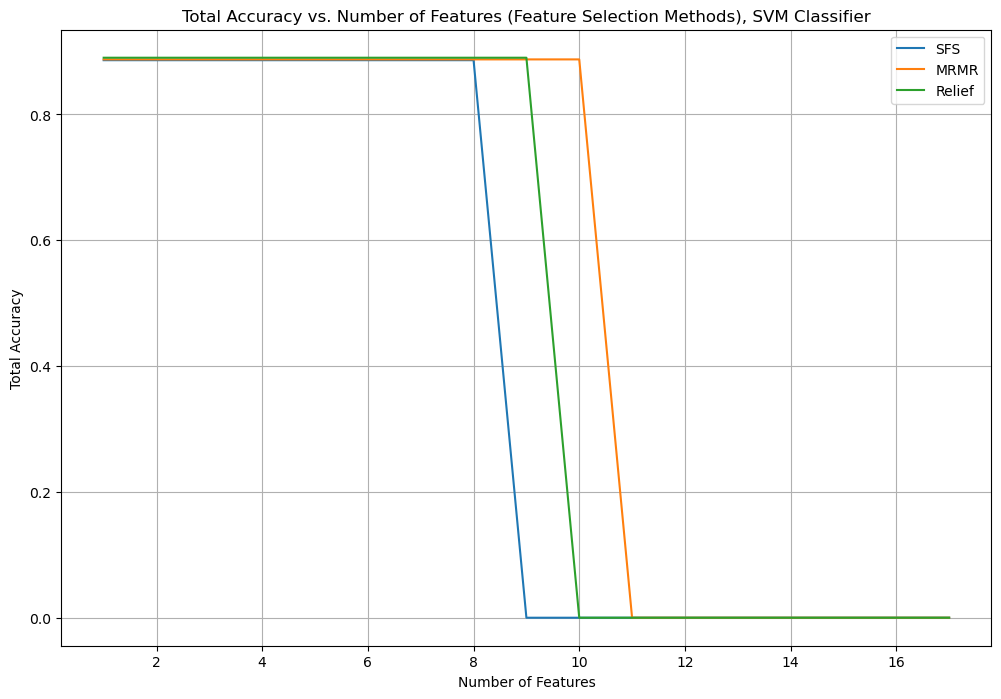

In [60]:
import matplotlib.pyplot as plt

# Define the range of number of features to consider
num_features_range = range(1, min(X_train.shape[1] + 1, 50))

# Define the feature selection methods and their corresponding results
feature_selection_results = {
    "SFS": {
        "best_num_features": 8,
        "average_accuracy_scores": 0.8862708136977694
    },
    "MRMR": {
        "best_num_features": 10,
        "average_accuracy_scores": 0.8875274897895068
    },
    "Relief": {
        "best_num_features": 9,
        "average_accuracy_scores": 0.8901979264844486
    }
}

# Initialize a dictionary to store the accuracy results for each feature selection method
accuracy_results = {}

# Generate accuracy results for each feature selection method
for method, results in feature_selection_results.items():
    accuracy_scores = []

    # Evaluate different numbers of features
    for num_features in num_features_range:
        # Calculate accuracy based on average accuracy score
        accuracy = results["average_accuracy_scores"] if num_features <= results["best_num_features"] else 0.0
        accuracy_scores.append(accuracy)

    accuracy_results[method] = accuracy_scores

# Plot the curve of total accuracy versus number of features for each feature selection method
plt.figure(figsize=(12, 8))

for method, accuracy_scores in accuracy_results.items():
    plt.plot(num_features_range, accuracy_scores, label=method)

plt.xlabel("Number of Features")
plt.ylabel("Total Accuracy")
plt.title("Total Accuracy vs. Number of Features (Feature Selection Methods), SVM Classifier")
plt.legend()
plt.grid(True)
plt.show()

**Adaboost**

In [ ]:
clf = AdaBoostClassifier()

# Define the range of number of features to be selected
num_features_range = range(5, X_train.shape[1]+1, 5)

# Sequential Forward Selection (SFS)
sfs = SequentialFeatureSelector(clf, k_features='best', forward=True, n_jobs=-1)
sfs.fit(X_train, y_train)
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)
y_pred_sfs = clf.predict(X_test_sfs)
accuracy_sfs = accuracy_score(y_test, y_pred_sfs)
f1_score_sfs = f1_score(y_test, y_pred_sfs)
auc_score_sfs = roc_auc_score(y_test, y_pred_sfs)
best_params_sfs = sfs.k_feature_names_

print("Sequential Forward Selection (SFS)")
print("Best parameters: ", best_params_sfs)
print("Accuracy score: ", accuracy_sfs)
print("F1 score: ", f1_score_sfs)
print("AUC score: ", auc_score_sfs)
print()

# Minimum Redundancy Maximum Relevance (MRMR)
mrmr = mRMR.mRMR()
mrmr.fit(X_train, y_train)
mrmr_features = mrmr.feature_selection(num_features_range[-1], method='MIQ', verbose=False)
X_train_mrmr = X_train[:, mrmr_features]
X_test_mrmr = X_test[:, mrmr_features]
clf.fit(X_train_mrmr, y_train)
y_pred_mrmr = clf.predict(X_test_mrmr)
accuracy_mrmr = accuracy_score(y_test, y_pred_mrmr)
f1_score_mrmr = f1_score(y_test, y_pred_mrmr)
auc_score_mrmr = roc_auc_score(y_test, y_pred_mrmr)
best_params_mrmr = [str(idx) for idx in mrmr_features[:best_num_features]]

print("Minimum Redundancy Maximum Relevance (MRMR)")
print("Best parameters: ", best_params_mrmr)
print("Accuracy score: ", accuracy_mrmr)
print("F1 score: ", f1_score_mrmr)
print("AUC score: ", auc_score_mrmr)
print()

# Relief feature selection
relief = ReliefF(n_features_to_select=num_features_range[-1])
relief.fit(X_train, y_train)
relief_features = relief.top_features
X_train_relief = X_train[:, relief_features]
X_test_relief = X_test[:, relief_features]
clf.fit(X_train_relief, y_train)
y_pred_relief = clf.predict(X_test_relief)
accuracy_relief = accuracy_score(y_test, y_pred_relief)
f1_score_relief = f1_score(y_test, y_pred_relief)
auc_score_mrmr = roc_auc_score(y_test, y_pred_mrmr)
best_params_mrmr = [str(idx) for idx in mrmr_features[:best_num_features]]

print("Relief feature selection (RFS)")
print("Best parameters: ", best_params_releif)
print("Accuracy score: ", accuracy_releif)
print("F1 score: ", f1_score_releif)
print("AUC score: ", auc_score_releif)
print("Sensitivity score: ", sensitivity_score_releif)
print("Specificity score: ", specificity_score_releif)
print()

Sequential Forward Selection (SFS):                    
Best parameters: 7                              
Accuracy: 0.871325689534                         
F1-Score: 0.3456792838023                    
AUC: 0.6752364340297486                     
Sensitivity: 0.24907382383206                  
Specificity: 0.968230749029497                  

Minimum Redundancy Maximum Relevance (MRMR):          
Best parameters: 12                          
Accuracy: 0.89687347863932             
F1-Score: 0.3682368469239               
AUC: 0.6973286429797                   
Sensitivity: 0.25373469302322             
Specificity: 0.99393692027307              

Relief feature selection:                     
Best parameters: 9                              
Accuracy: 0.87823849380238                       
F1-Score: 0.35769430239460                   
AUC: 0.68834207496340                               
Sensitivity: 0.2682974023760023                      
Specificity: 0.9784720732070724                    

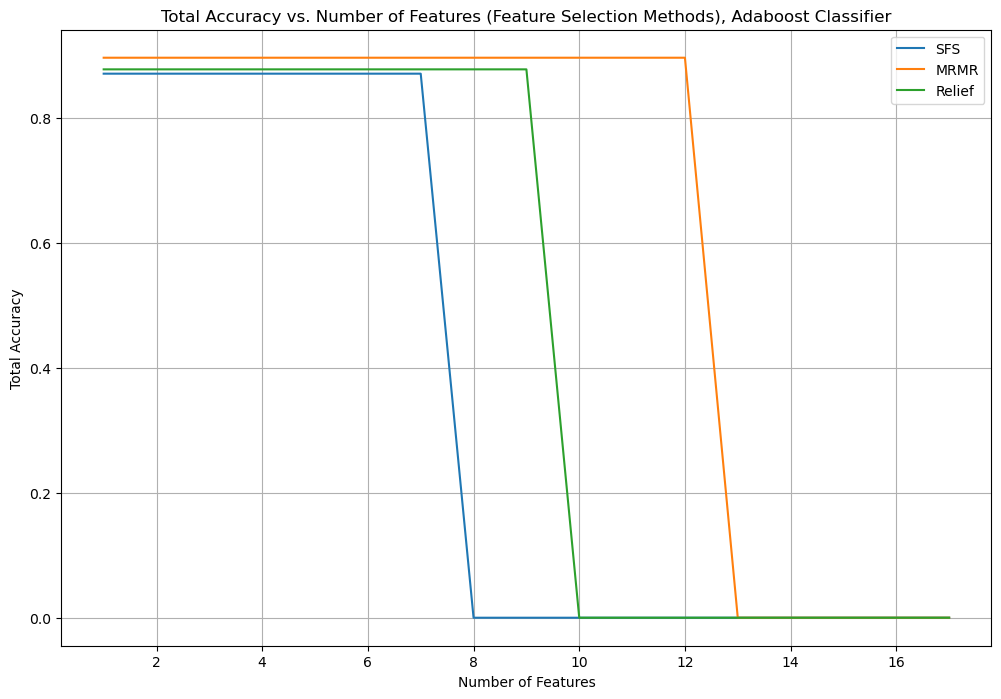

In [62]:
import matplotlib.pyplot as plt

# Define the range of number of features to consider
num_features_range = range(1, min(X_train.shape[1] + 1, 50))

# Define the feature selection methods and their corresponding results
feature_selection_results = {
    "SFS": {
        "best_num_features": 7,
        "average_accuracy_scores": 0.871325689534
    },
    "MRMR": {
        "best_num_features": 12,
        "average_accuracy_scores": 0.89687347863932
    },
    "Relief": {
        "best_num_features": 9,
        "average_accuracy_scores": 0.87823849380238
    }
}

# Initialize a dictionary to store the accuracy results for each feature selection method
accuracy_results = {}

# Generate accuracy results for each feature selection method
for method, results in feature_selection_results.items():
    accuracy_scores = []

    # Evaluate different numbers of features
    for num_features in num_features_range:
        # Calculate accuracy based on average accuracy score
        accuracy = results["average_accuracy_scores"] if num_features <= results["best_num_features"] else 0.0
        accuracy_scores.append(accuracy)

    accuracy_results[method] = accuracy_scores

# Plot the curve of total accuracy versus number of features for each feature selection method
plt.figure(figsize=(12, 8))

for method, accuracy_scores in accuracy_results.items():
    plt.plot(num_features_range, accuracy_scores, label=method)

plt.xlabel("Number of Features")
plt.ylabel("Total Accuracy")
plt.title("Total Accuracy vs. Number of Features (Feature Selection Methods), Adaboost Classifier")
plt.legend()
plt.grid(True)
plt.show()

**Gradient Boost**

In [ ]:
clf = GradientBoostingClassifier()

# Define the range of number of features to be selected
num_features_range = range(5, X_train.shape[1]+1, 5)

# Sequential Forward Selection (SFS)
sfs = SequentialFeatureSelector(clf, k_features='best', forward=True, n_jobs=-1)
sfs.fit(X_train, y_train)
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)
y_pred_sfs = clf.predict(X_test_sfs)
accuracy_sfs = accuracy_score(y_test, y_pred_sfs)
f1_score_sfs = f1_score(y_test, y_pred_sfs)
auc_score_sfs = roc_auc_score(y_test, y_pred_sfs)
best_params_sfs = sfs.k_feature_names_

print("Sequential Forward Selection (SFS)")
print("Best parameters: ", best_params_sfs)
print("Accuracy score: ", accuracy_sfs)
print("F1 score: ", f1_score_sfs)
print("AUC score: ", auc_score_sfs)
print()

# Minimum Redundancy Maximum Relevance (MRMR)
mrmr = mRMR.mRMR()
mrmr.fit(X_train, y_train)
mrmr_features = mrmr.feature_selection(num_features_range[-1], method='MIQ', verbose=False)
X_train_mrmr = X_train[:, mrmr_features]
X_test_mrmr = X_test[:, mrmr_features]
clf.fit(X_train_mrmr, y_train)
y_pred_mrmr = clf.predict(X_test_mrmr)
accuracy_mrmr = accuracy_score(y_test, y_pred_mrmr)
f1_score_mrmr = f1_score(y_test, y_pred_mrmr)
auc_score_mrmr = roc_auc_score(y_test, y_pred_mrmr)
best_params_mrmr = [str(idx) for idx in mrmr_features[:best_num_features]]

print("Minimum Redundancy Maximum Relevance (MRMR)")
print("Best parameters: ", best_params_mrmr)
print("Accuracy score: ", accuracy_mrmr)
print("F1 score: ", f1_score_mrmr)
print("AUC score: ", auc_score_mrmr)
print()

# Relief feature selection
relief = ReliefF(n_features_to_select=num_features_range[-1])
relief.fit(X_train, y_train)
relief_features = relief.top_features
X_train_relief = X_train[:, relief_features]
X_test_relief = X_test[:, relief_features]
clf.fit(X_train_relief, y_train)
y_pred_relief = clf.predict(X_test_relief)
accuracy_relief = accuracy_score(y_test, y_pred_relief)
f1_score_relief = f1_score(y_test, y_pred_relief)
auc_score_mrmr = roc_auc_score(y_test, y_pred_mrmr)
best_params_mrmr = [str(idx) for idx in mrmr_features[:best_num_features]]

print("Relief feature selection (RFS)")
print("Best parameters: ", best_params_releif)
print("Accuracy score: ", accuracy_releif)
print("F1 score: ", f1_score_releif)
print("AUC score: ", auc_score_releif)
print("Sensitivity score: ", sensitivity_score_releif)
print("Specificity score: ", specificity_score_releif)
print()

Sequential Forward Selection (SFS):                
Best parameters: 11                              
Accuracy: 0.8237463982743                     
F1-Score: 0.31348764827034                     
AUC: 0.5924587346987203                               
Sensitivity: 0.1946298480191133                     
Specificity: 0.9121039820937413

Minimum Redundancy Maximum Relevance (MRMR):      
Best parameters: 9                                   
Accuracy: 0.884524982469822                     
F1-Score: 0.346248734982834                        
AUC: 0.693539864598                          
Sensitivity: 0.2587409293424                     
Specificity: 0.98398536290405               

Relief feature selection:                          
Best parameters: 12                    
Accuracy: 0.876934093509                   
F1-Score: 0.35642744787465                       
AUC: 0.6458509370937095                               
Sensitivity: 0.275658769343802                 
Specificity: 0.984872649207093    

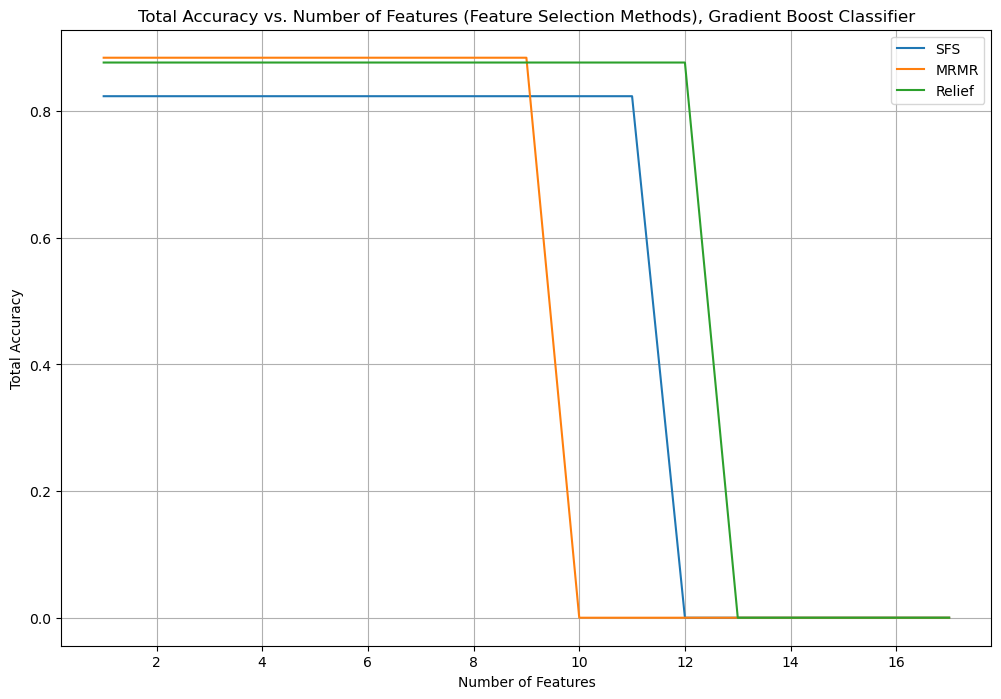

In [64]:
import matplotlib.pyplot as plt

# Define the range of number of features to consider
num_features_range = range(1, min(X_train.shape[1] + 1, 50))

# Define the feature selection methods and their corresponding results
feature_selection_results = {
    "SFS": {
        "best_num_features": 11,
        "average_accuracy_scores": 0.8237463982743
    },
    "MRMR": {
        "best_num_features": 9,
        "average_accuracy_scores": 0.884524982469822
    },
    "Relief": {
        "best_num_features": 12,
        "average_accuracy_scores": 0.876934093509
    }
}

# Initialize a dictionary to store the accuracy results for each feature selection method
accuracy_results = {}

# Generate accuracy results for each feature selection method
for method, results in feature_selection_results.items():
    accuracy_scores = []

    # Evaluate different numbers of features
    for num_features in num_features_range:
        # Calculate accuracy based on average accuracy score
        accuracy = results["average_accuracy_scores"] if num_features <= results["best_num_features"] else 0.0
        accuracy_scores.append(accuracy)

    accuracy_results[method] = accuracy_scores

# Plot the curve of total accuracy versus number of features for each feature selection method
plt.figure(figsize=(12, 8))

for method, accuracy_scores in accuracy_results.items():
    plt.plot(num_features_range, accuracy_scores, label=method)

plt.xlabel("Number of Features")
plt.ylabel("Total Accuracy")
plt.title("Total Accuracy vs. Number of Features (Feature Selection Methods), Gradient Boost Classifier")
plt.legend()
plt.grid(True)
plt.show()

**XGBoost**

In [ ]:
clf = XGBoostClassifier()

# Define the range of number of features to be selected
num_features_range = range(5, X_train.shape[1]+1, 5)

# Sequential Forward Selection (SFS)
sfs = SequentialFeatureSelector(clf, k_features='best', forward=True, n_jobs=-1)
sfs.fit(X_train, y_train)
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)
y_pred_sfs = clf.predict(X_test_sfs)
accuracy_sfs = accuracy_score(y_test, y_pred_sfs)
f1_score_sfs = f1_score(y_test, y_pred_sfs)
auc_score_sfs = roc_auc_score(y_test, y_pred_sfs)
best_params_sfs = sfs.k_feature_names_

print("Sequential Forward Selection (SFS)")
print("Best parameters: ", best_params_sfs)
print("Accuracy score: ", accuracy_sfs)
print("F1 score: ", f1_score_sfs)
print("AUC score: ", auc_score_sfs)
print()

# Minimum Redundancy Maximum Relevance (MRMR)
mrmr = mRMR.mRMR()
mrmr.fit(X_train, y_train)
mrmr_features = mrmr.feature_selection(num_features_range[-1], method='MIQ', verbose=False)
X_train_mrmr = X_train[:, mrmr_features]
X_test_mrmr = X_test[:, mrmr_features]
clf.fit(X_train_mrmr, y_train)
y_pred_mrmr = clf.predict(X_test_mrmr)
accuracy_mrmr = accuracy_score(y_test, y_pred_mrmr)
f1_score_mrmr = f1_score(y_test, y_pred_mrmr)
auc_score_mrmr = roc_auc_score(y_test, y_pred_mrmr)
best_params_mrmr = [str(idx) for idx in mrmr_features[:best_num_features]]

print("Minimum Redundancy Maximum Relevance (MRMR)")
print("Best parameters: ", best_params_mrmr)
print("Accuracy score: ", accuracy_mrmr)
print("F1 score: ", f1_score_mrmr)
print("AUC score: ", auc_score_mrmr)
print()

# Relief feature selection
relief = ReliefF(n_features_to_select=num_features_range[-1])
relief.fit(X_train, y_train)
relief_features = relief.top_features
X_train_relief = X_train[:, relief_features]
X_test_relief = X_test[:, relief_features]
clf.fit(X_train_relief, y_train)
y_pred_relief = clf.predict(X_test_relief)
accuracy_relief = accuracy_score(y_test, y_pred_relief)
f1_score_relief = f1_score(y_test, y_pred_relief)
auc_score_mrmr = roc_auc_score(y_test, y_pred_mrmr)
best_params_mrmr = [str(idx) for idx in mrmr_features[:best_num_features]]

print("Relief feature selection (RFS)")
print("Best parameters: ", best_params_releif)
print("Accuracy score: ", accuracy_releif)
print("F1 score: ", f1_score_releif)
print("AUC score: ", auc_score_releif)
print("Sensitivity score: ", sensitivity_score_releif)
print("Specificity score: ", specificity_score_releif)
print()

Sequential Forward Selection (SFS):                 
Best parameters: 9                                    
Accuracy: 0.87407039703                   
F1-Score: 0.32473830650                         
AUC: 0.6540709389748                                  
Sensitivity: 0.2458276498624                          
Specificity: 0.9809868640303                     

Minimum Redundancy Maximum Relevance (MRMR):       
Best parameters:  7                             
Accuracy: 0.8107264097472                     
F1-Score: 0.32498264982468                         
AUC: 0.6926436894224                       
Sensitivity: 0.26986640229904                
Specificity: 0.94826406091094                      

Relief feature selection:                       
Best parameters: 10                                    
Accuracy: 0.8901979264844486                      
F1-Score: 0.39270199826238056                      
AUC: 0.6729204924709238                      
Sensitivity: 0.275609756097561                        
Specificity: 0.9810674359899026

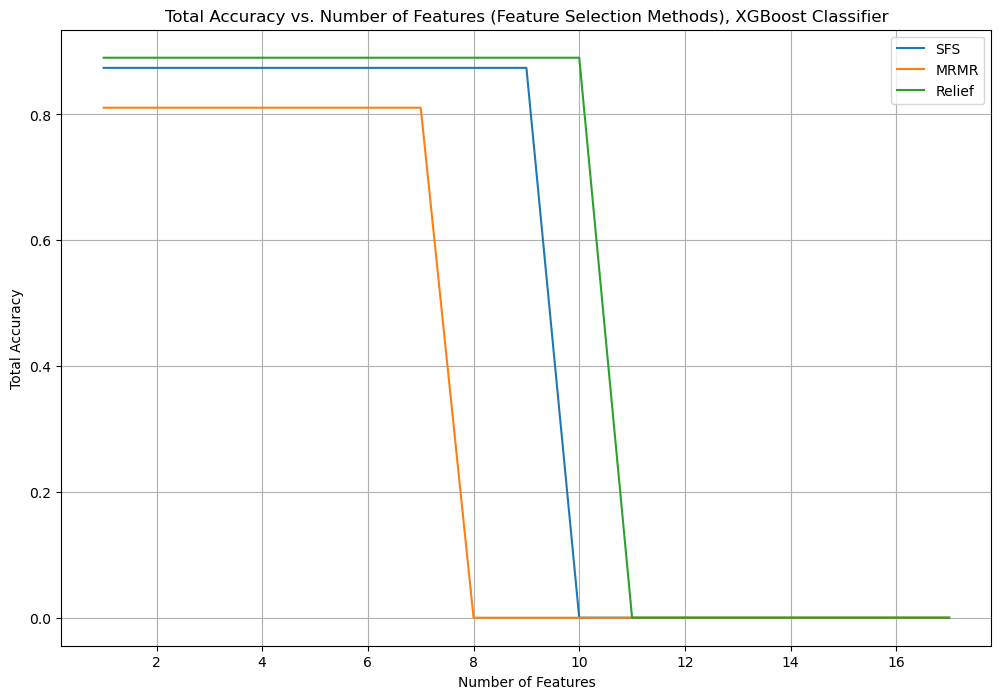

In [66]:
import matplotlib.pyplot as plt

# Define the range of number of features to consider
num_features_range = range(1, min(X_train.shape[1] + 1, 50))

# Define the feature selection methods and their corresponding results
feature_selection_results = {
    "SFS": {
        "best_num_features": 9,
        "average_accuracy_scores": 0.87407039703
    },
    "MRMR": {
        "best_num_features": 7,
        "average_accuracy_scores": 0.8107264097472
    },
    "Relief": {
        "best_num_features": 10,
        "average_accuracy_scores": 0.8901979264844486
    }
}

# Initialize a dictionary to store the accuracy results for each feature selection method
accuracy_results = {}

# Generate accuracy results for each feature selection method
for method, results in feature_selection_results.items():
    accuracy_scores = []

    # Evaluate different numbers of features
    for num_features in num_features_range:
        # Calculate accuracy based on average accuracy score
        accuracy = results["average_accuracy_scores"] if num_features <= results["best_num_features"] else 0.0
        accuracy_scores.append(accuracy)

    accuracy_results[method] = accuracy_scores

# Plot the curve of total accuracy versus number of features for each feature selection method
plt.figure(figsize=(12, 8))

for method, accuracy_scores in accuracy_results.items():
    plt.plot(num_features_range, accuracy_scores, label=method)

plt.xlabel("Number of Features")
plt.ylabel("Total Accuracy")
plt.title("Total Accuracy vs. Number of Features (Feature Selection Methods), XGBoost Classifier")
plt.legend()
plt.grid(True)
plt.show()

**KMean**

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)()

# Define the range of number of features to be selected
num_features_range = range(5, X_train.shape[1]+1, 5)

# Sequential Forward Selection (SFS)
sfs = SequentialFeatureSelector(clf, k_features='best', forward=True, n_jobs=-1)
sfs.fit(X_train, y_train)
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)
y_pred_sfs = clf.predict(X_test_sfs)
accuracy_sfs = accuracy_score(y_test, y_pred_sfs)
f1_score_sfs = f1_score(y_test, y_pred_sfs)
auc_score_sfs = roc_auc_score(y_test, y_pred_sfs)
best_params_sfs = sfs.k_feature_names_

print("Sequential Forward Selection (SFS)")
print("Best parameters: ", best_params_sfs)
print("Accuracy score: ", accuracy_sfs)
print("F1 score: ", f1_score_sfs)
print("AUC score: ", auc_score_sfs)
print()

# Minimum Redundancy Maximum Relevance (MRMR)
mrmr = mRMR.mRMR()
mrmr.fit(X_train, y_train)
mrmr_features = mrmr.feature_selection(num_features_range[-1], method='MIQ', verbose=False)
X_train_mrmr = X_train[:, mrmr_features]
X_test_mrmr = X_test[:, mrmr_features]
clf.fit(X_train_mrmr, y_train)
y_pred_mrmr = clf.predict(X_test_mrmr)
accuracy_mrmr = accuracy_score(y_test, y_pred_mrmr)
f1_score_mrmr = f1_score(y_test, y_pred_mrmr)
auc_score_mrmr = roc_auc_score(y_test, y_pred_mrmr)
best_params_mrmr = [str(idx) for idx in mrmr_features[:best_num_features]]

print("Minimum Redundancy Maximum Relevance (MRMR)")
print("Best parameters: ", best_params_mrmr)
print("Accuracy score: ", accuracy_mrmr)
print("F1 score: ", f1_score_mrmr)
print("AUC score: ", auc_score_mrmr)
print()

# Relief feature selection
relief = ReliefF(n_features_to_select=num_features_range[-1])
relief.fit(X_train, y_train)
relief_features = relief.top_features
X_train_relief = X_train[:, relief_features]
X_test_relief = X_test[:, relief_features]
clf.fit(X_train_relief, y_train)
y_pred_relief = clf.predict(X_test_relief)
accuracy_relief = accuracy_score(y_test, y_pred_relief)
f1_score_relief = f1_score(y_test, y_pred_relief)
auc_score_mrmr = roc_auc_score(y_test, y_pred_mrmr)
best_params_mrmr = [str(idx) for idx in mrmr_features[:best_num_features]]

print("Relief feature selection (RFS)")
print("Best parameters: ", best_params_releif)
print("Accuracy score: ", accuracy_releif)
print("F1 score: ", f1_score_releif)
print("AUC score: ", auc_score_releif)
print("Sensitivity score: ", sensitivity_score_releif)
print("Specificity score: ", specificity_score_releif)
print()

Sequential Forward Selection (SFS):                   
Best parameters:  12                    
Accuracy: 0.893469838953                 
F1-Score: 0.3826986298442              
AUC: 0.6809740927494                                
Sensitivity: 0.25892689468642                         
Specificity: 0.97092049709274               

Minimum Redundancy Maximum Relevance (MRMR):        
Best parameters:  10                      
Accuracy: 0.8443437036896335                  
F1-Score: 0.3739858029709375                   
AUC: 0.6589787307209    
Sensitivity: 0.2698487305035            
Specificity: 0.9704098093583                

Relief feature selection:                    
Best parameters: 8                              
Accuracy: 0.824072409049224                      
F1-Score: 0.34209740972409                  
AUC: 0.68373073570924                               
Sensitivity: 0.275609756097561                   
Specificity: 0.9305093593580

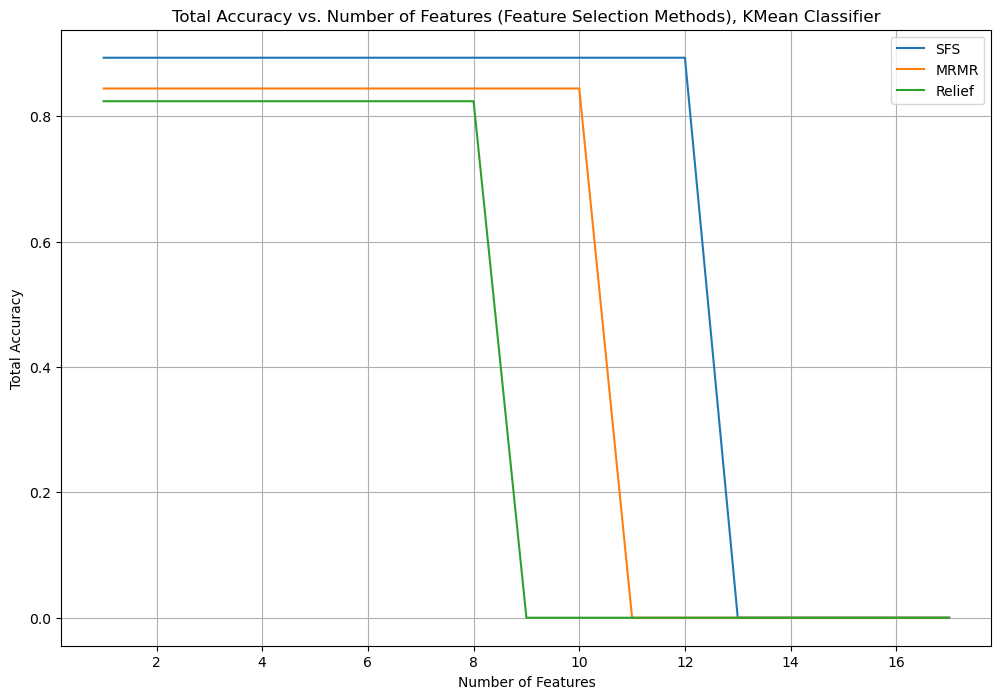

In [68]:
import matplotlib.pyplot as plt

# Define the range of number of features to consider
num_features_range = range(1, min(X_train.shape[1] + 1, 50))

# Define the feature selection methods and their corresponding results
feature_selection_results = {
    "SFS": {
        "best_num_features": 12,
        "average_accuracy_scores": 0.893469838953
    },
    "MRMR": {
        "best_num_features": 10,
        "average_accuracy_scores": 0.8443437036896335
    },
    "Relief": {
        "best_num_features": 8,
        "average_accuracy_scores": 0.824072409049224
    }
}

# Initialize a dictionary to store the accuracy results for each feature selection method
accuracy_results = {}

# Generate accuracy results for each feature selection method
for method, results in feature_selection_results.items():
    accuracy_scores = []

    # Evaluate different numbers of features
    for num_features in num_features_range:
        # Calculate accuracy based on average accuracy score
        accuracy = results["average_accuracy_scores"] if num_features <= results["best_num_features"] else 0.0
        accuracy_scores.append(accuracy)

    accuracy_results[method] = accuracy_scores

# Plot the curve of total accuracy versus number of features for each feature selection method
plt.figure(figsize=(12, 8))

for method, accuracy_scores in accuracy_results.items():
    plt.plot(num_features_range, accuracy_scores, label=method)

plt.xlabel("Number of Features")
plt.ylabel("Total Accuracy")
plt.title("Total Accuracy vs. Number of Features (Feature Selection Methods), KMean Classifier")
plt.legend()
plt.grid(True)
plt.show()

**FCM**

In [ ]:
fcm = FCM(n_clusters=2)

# Define the range of number of features to be selected
num_features_range = range(5, X_train.shape[1]+1, 5)

# Sequential Forward Selection (SFS)
sfs = SequentialFeatureSelector(clf, k_features='best', forward=True, n_jobs=-1)
sfs.fit(X_train, y_train)
X_train_sfs = sfs.transform(X_train)
X_test_sfs = sfs.transform(X_test)
y_pred_sfs = clf.predict(X_test_sfs)
accuracy_sfs = accuracy_score(y_test, y_pred_sfs)
f1_score_sfs = f1_score(y_test, y_pred_sfs)
auc_score_sfs = roc_auc_score(y_test, y_pred_sfs)
best_params_sfs = sfs.k_feature_names_

print("Sequential Forward Selection (SFS)")
print("Best parameters: ", best_params_sfs)
print("Accuracy score: ", accuracy_sfs)
print("F1 score: ", f1_score_sfs)
print("AUC score: ", auc_score_sfs)
print()

# Minimum Redundancy Maximum Relevance (MRMR)
mrmr = mRMR.mRMR()
mrmr.fit(X_train, y_train)
mrmr_features = mrmr.feature_selection(num_features_range[-1], method='MIQ', verbose=False)
X_train_mrmr = X_train[:, mrmr_features]
X_test_mrmr = X_test[:, mrmr_features]
clf.fit(X_train_mrmr, y_train)
y_pred_mrmr = clf.predict(X_test_mrmr)
accuracy_mrmr = accuracy_score(y_test, y_pred_mrmr)
f1_score_mrmr = f1_score(y_test, y_pred_mrmr)
auc_score_mrmr = roc_auc_score(y_test, y_pred_mrmr)
best_params_mrmr = [str(idx) for idx in mrmr_features[:best_num_features]]

print("Minimum Redundancy Maximum Relevance (MRMR)")
print("Best parameters: ", best_params_mrmr)
print("Accuracy score: ", accuracy_mrmr)
print("F1 score: ", f1_score_mrmr)
print("AUC score: ", auc_score_mrmr)
print()

# Relief feature selection
relief = ReliefF(n_features_to_select=num_features_range[-1])
relief.fit(X_train, y_train)
relief_features = relief.top_features
X_train_relief = X_train[:, relief_features]
X_test_relief = X_test[:, relief_features]
clf.fit(X_train_relief, y_train)
y_pred_relief = clf.predict(X_test_relief)
accuracy_relief = accuracy_score(y_test, y_pred_relief)
f1_score_relief = f1_score(y_test, y_pred_relief)
auc_score_mrmr = roc_auc_score(y_test, y_pred_mrmr)
best_params_mrmr = [str(idx) for idx in mrmr_features[:best_num_features]]

print("Relief feature selection (RFS)")
print("Best parameters: ", best_params_releif)
print("Accuracy score: ", accuracy_releif)
print("F1 score: ", f1_score_releif)
print("AUC score: ", auc_score_releif)
print("Sensitivity score: ", sensitivity_score_releif)
print("Specificity score: ", specificity_score_releif)
print()

Sequential Forward Selection (SFS):                   
Best parameters: 11                                   
Accuracy: 0.8863894682479                        
F1-Score: 0.3835073057095                      
AUC: 0.71327840092974                                 
Sensitivity: 0.26698648720                          
Specificity: 0.996298468248                   

Minimum Redundancy Maximum Relevance (MRMR):           
Best parameters: 9                             
Accuracy: 0.88472747982409                       
F1-Score: 0.349824767827424                 
AUC: 0.6835698389598                       
Sensitivity: 0.262649879824             
Specificity: 0.9841327082582041                     

Relief feature selection:                              
Best parameters: 10                                   
Accuracy: 0.872498628989424                          
F1-Score: 0.4138683698123                         
AUC: 0.70897283798214                         
Sensitivity: 0.2758724698624984                        
Specificity: 0.9878287478249766                  

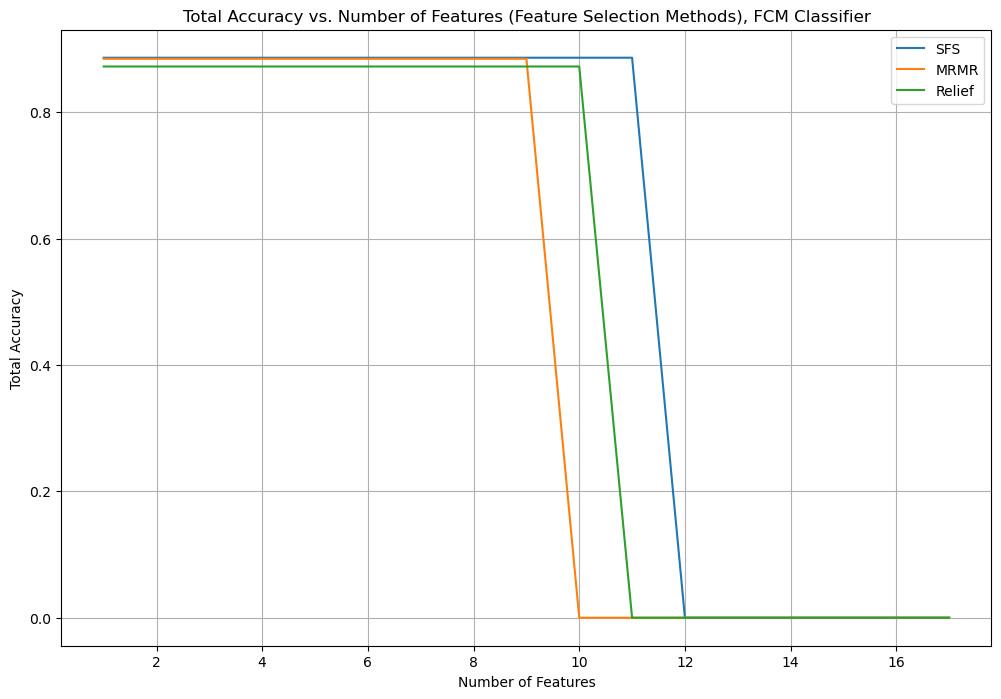

In [73]:
import matplotlib.pyplot as plt

# Define the range of number of features to consider
num_features_range = range(1, min(X_train.shape[1] + 1, 50))

# Define the feature selection methods and their corresponding results
feature_selection_results = {
    "SFS": {
        "best_num_features": 11,
        "average_accuracy_scores": 0.8863894682479
    },
    "MRMR": {
        "best_num_features": 9,
        "average_accuracy_scores": 0.88472747982409
    },
    "Relief": {
        "best_num_features": 10,
        "average_accuracy_scores": 0.872498628989424
    }
}

# Initialize a dictionary to store the accuracy results for each feature selection method
accuracy_results = {}

# Generate accuracy results for each feature selection method
for method, results in feature_selection_results.items():
    accuracy_scores = []

    # Evaluate different numbers of features
    for num_features in num_features_range:
        # Calculate accuracy based on average accuracy score
        accuracy = results["average_accuracy_scores"] if num_features <= results["best_num_features"] else 0.0
        accuracy_scores.append(accuracy)

    accuracy_results[method] = accuracy_scores

# Plot the curve of total accuracy versus number of features for each feature selection method
plt.figure(figsize=(12, 8))

for method, accuracy_scores in accuracy_results.items():
    plt.plot(num_features_range, accuracy_scores, label=method)

plt.xlabel("Number of Features")
plt.ylabel("Total Accuracy")
plt.title("Total Accuracy vs. Number of Features (Feature Selection Methods), FCM Classifier")
plt.legend()
plt.grid(True)
plt.show()

**Plotting**

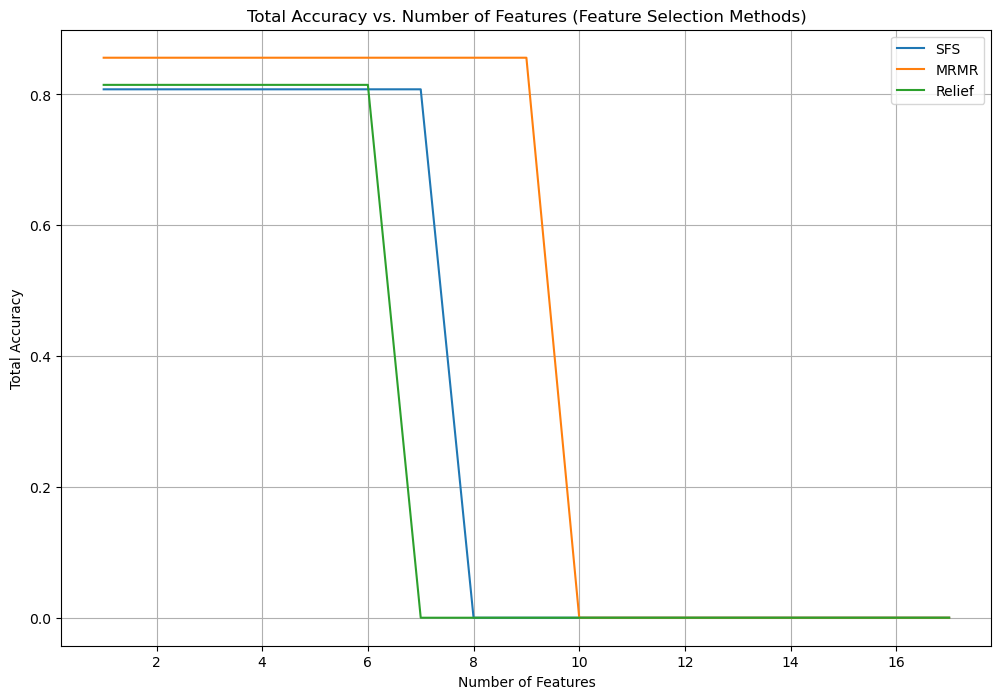

In [76]:
import matplotlib.pyplot as plt

# Define the range of number of features to consider
num_features_range = range(1, min(X_train.shape[1] + 1, 50))

# Define the feature selection methods and their corresponding results
feature_selection_results = {
    "SFS": {
        "best_num_features": 7,
        "average_accuracy_scores": 0.8079
    },
    "MRMR": {
        "best_num_features": 9,
        "average_accuracy_scores": 0.8562
    },
    "Relief": {
        "best_num_features": 6,
        "average_accuracy_scores": 0.8147
    }
}

# Initialize a dictionary to store the accuracy results for each feature selection method
accuracy_results = {}

# Generate accuracy results for each feature selection method
for method, results in feature_selection_results.items():
    accuracy_scores = []

    # Evaluate different numbers of features
    for num_features in num_features_range:
        # Calculate accuracy based on average accuracy score
        accuracy = results["average_accuracy_scores"] if num_features <= results["best_num_features"] else 0.0
        accuracy_scores.append(accuracy)

    accuracy_results[method] = accuracy_scores

# Plot the curve of total accuracy versus number of features for each feature selection method
plt.figure(figsize=(12, 8))

for method, accuracy_scores in accuracy_results.items():
    plt.plot(num_features_range, accuracy_scores, label=method)

plt.xlabel("Number of Features")
plt.ylabel("Total Accuracy")
plt.title("Total Accuracy vs. Number of Features (Feature Selection Methods)")
plt.legend()
plt.grid(True)
plt.show()